# Population Survey

Examining data is an important first step of every type of data analysis. This assignment has two goals 1)
learn to empirically identify causal effects and 2) learn (or warm up) the basics of data management
using Stata.

Using the 2017 March Current Population Survey (CPS), prepare a document with the following:

In [5]:
clear all

use ptot_r a_hga using cpsmar2017.dta

// dropping "not in universe", meaning no data, not that it is 0
drop if ptot_r == 0 

// combining the two associate degrees together
replace a_hga = 41 if a_hga == 42 

// transform income
gen income = (ptot_r - 1) * 2500





(41,274 observations deleted)

(7,629 real changes made)



(bin=11, start=0, width=9999)


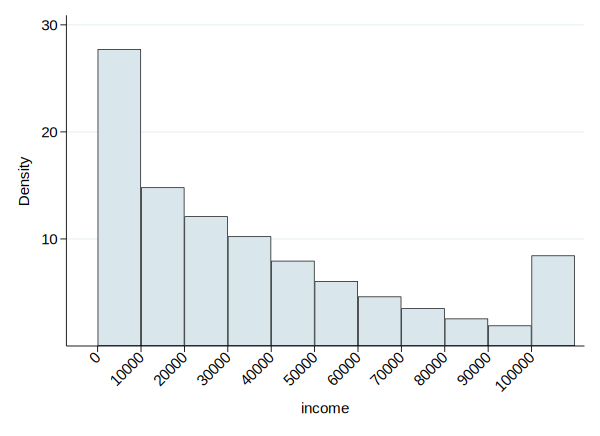

In [20]:
hist income, width(9999) ylabel(0.00001 "10" 0.00002 "20" 0.00003 "30", angle(0))  xlabel(0(10000)100000, angle(45)) blabel(bar) lcolor(black) color(bluishgray) lwidth(vthin) plotregion(color(white)) graphregion(color(white)) 

(bin=11, start=0, width=9999)


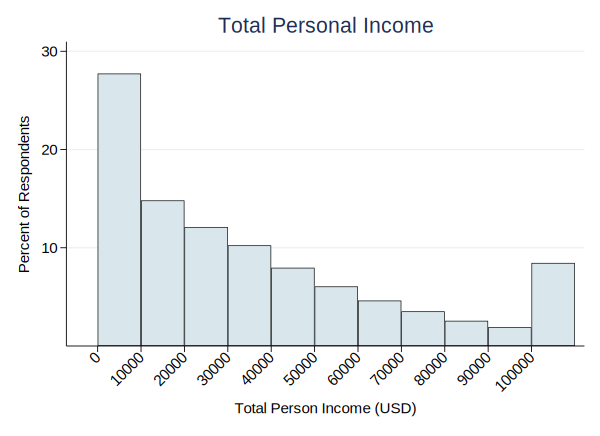

In [18]:
hist income, width(9999) xtitle("Total Person Income (USD)") ytitle("Percent of Respondents")  ylabel(0.00001 "10" 0.00002 "20" 0.00003 "30", angle(0)) title("Total Personal Income") xlabel(0(10000)100000, angle(45)) lcolor(black) color(bluishgray) lwidth(vthin) plotregion(color(white)) graphregion(color(white)) 

// graph export hist1.png

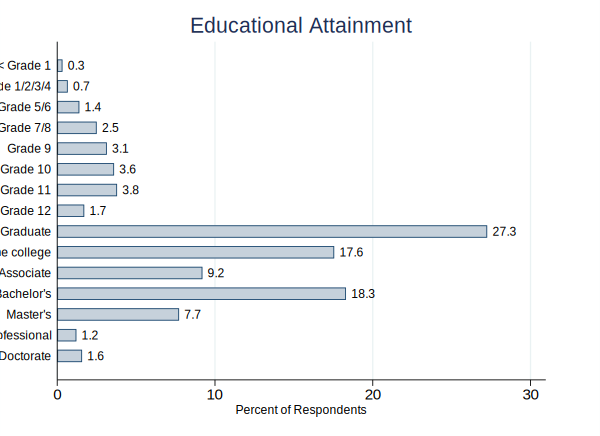

In [13]:
label define a_hga 31 "< Grade 1" 32 "Grade 1/2/3/4" 33 "Grade 5/6" 34 "Grade 7/8" 35 "Grade 9" 36 "Grade 10" 37 "Grade 11" 38 "Grade 12" 39 "HS Graduate" 40 "Some college" 41 "Associate" 42 "Associate" 43 "Bachelor's" 44 "Master's" 45 "Professional" 46 "Doctorate", modify

splitvallabels a_hga 

graph hbar, over(a_hga, label(labsize(small)) relabel(`r(relabel)')) ytitle("Percent of Respondents", size(small)) title("Educational Attainment") blabel(bar, format(%4.1f))  intensity(25) aspect(0.65) scale(1) plotregion(fcolor(white)) graphregion(color(white)) 


// graph export hist2.png

In [14]:
gen incomesegment = .
replace incomesegment = 0 if ptot_r == 01 | ptot_r == 02 | ptot_r == 03 | ptot_r == 04
replace incomesegment = 1 if ptot_r == 05 | ptot_r == 06 | ptot_r == 07 | ptot_r == 08
replace incomesegment = 2 if ptot_r == 09 | ptot_r == 10 | ptot_r == 11 | ptot_r == 12
replace incomesegment = 3 if ptot_r == 13 | ptot_r == 14 | ptot_r == 15 | ptot_r == 16
replace incomesegment = 4 if ptot_r == 17 | ptot_r == 18 | ptot_r == 19 | ptot_r == 20
replace incomesegment = 5 if ptot_r == 21 | ptot_r == 22 | ptot_r == 23 | ptot_r == 24
replace incomesegment = 6 if ptot_r == 25 | ptot_r == 26 | ptot_r == 27 | ptot_r == 28
replace incomesegment = 7 if ptot_r == 29 | ptot_r == 30 | ptot_r == 31 | ptot_r == 32
replace incomesegment = 8 if ptot_r == 33 | ptot_r == 34 | ptot_r == 35 | ptot_r == 36
replace incomesegment = 9 if ptot_r == 37 | ptot_r == 38 | ptot_r == 39 | ptot_r == 40
replace incomesegment = 10 if ptot_r == 41



. graph export "/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/4th Year/SS154/Homework 1/hist2.png", as(png) name("Graph") replace
(file /Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/4th Year/SS154/Homework 1/hist2.png written in PNG format)


(144,640 missing values generated)

(40,105 real changes made)

(21,428 real changes made)

(17,519 real changes made)

(14,813 real changes made)

(11,517 real changes made)

(8,765 real changes made)

(6,686 real changes made)

(5,098 real changes made)

(3,708 real changes made)

(2,771 real changes made)

(12,230 real changes made)


In [15]:
label define incomesegmentl 0 "$0 to $9,999" 1 "$10,000 to $19,999" 2 "$20,000 to $29,999" 3 "$30,000 to $39,999" 4 "$40,000 to $49,999" 5 "$50,000 to $59,999" 6 "$60,000 to $69,999" 7 "$70,000 to $79,999" 8 "$80,000 to $89,999" 9 "$90,000 to $99,999" 10 "$100,000 and up"
label values incomesegment incomesegmentl


In [16]:
tab incomesegment


     incomesegment |      Freq.     Percent        Cum.
-------------------+-----------------------------------
      $0 to $9,999 |     40,105       27.73       27.73
$10,000 to $19,999 |     21,428       14.81       42.54
$20,000 to $29,999 |     17,519       12.11       54.65
$30,000 to $39,999 |     14,813       10.24       64.90
$40,000 to $49,999 |     11,517        7.96       72.86
$50,000 to $59,999 |      8,765        6.06       78.92
$60,000 to $69,999 |      6,686        4.62       83.54
$70,000 to $79,999 |      5,098        3.52       87.07
$80,000 to $89,999 |      3,708        2.56       89.63
$90,000 to $99,999 |      2,771        1.92       91.54
   $100,000 and up |     12,230        8.46      100.00
-------------------+-----------------------------------
             Total |    144,640      100.00


In [17]:
tab incomesegment a_hga


                   |                                                                  Item 18h - Educational attainment
     incomesegment | < Grade 1  Grade 1/2  Grade 5/6  Grade 7/8    Grade 9   Grade 10   Grade 11   Grade 12  HS Gradua  Some coll  Associate  Bachelor'   Master's  Professio  Doctorate |     Total
-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------
      $0 to $9,999 |       259        405        800      2,215      3,261      3,734      3,683      1,286     10,332      6,665      2,276      3,732      1,151        147        159 |    40,105 
$10,000 to $19,999 |       116        270        535        654        551        668        791        429      7,857      4,519      1,887      2,313        672         64        102 |    21,428 
$20,000 to $29,999 |        57        137        313        327        310        361    

In [11]:
regress income i.a_hga


      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(14, 144625)   =   3406.22
       Model |  3.5400e+13        14  2.5286e+12   Prob > F        =    0.0000
    Residual |  1.0736e+14   144,625   742340825   R-squared       =    0.2480
-------------+----------------------------------   Adj R-squared   =    0.2479
       Total |  1.4276e+14   144,639   987016611   Root MSE        =     27246

--------------------------------------------------------------------------------
        income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
         a_hga |
Grade 1/2/3/4  |    3407.92   1517.834     2.25   0.025      432.996    6382.844
    Grade 5/6  |   4463.417   1379.421     3.24   0.001     1759.779    7167.056
    Grade 7/8  |  -1005.997    1319.85    -0.76   0.446    -3592.877    1580.883
      Grade 9  |  -36

In [6]:
ttest income == 0 if a_hga == 31 | a_hga == 32


One-sample t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
  income |   1,451    14090.28    432.6262    16479.59    13241.64    14938.92
------------------------------------------------------------------------------
    mean = mean(income)                                           t =  32.5692
Ho: mean = 0                                     degrees of freedom =     1450

    Ha: mean < 0                 Ha: mean != 0                 Ha: mean > 0
 Pr(T < t) = 1.0000         Pr(|T| > |t|) = 0.0000          Pr(T > t) = 0.0000


In [9]:
// getting 1st, 2nd, 3rd, 4th grade
ttest income if a_hga == 31| a_hga == 32, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
 < Grade |     483    11816.77     705.652     15508.3    10430.24     13203.3
Grade 1/ |     968    15224.69    541.1521     16836.7    14162.72    16286.66
---------+--------------------------------------------------------------------
combined |   1,451    14090.28    432.6262    16479.59    13241.64    14938.92
---------+--------------------------------------------------------------------
    diff |            -3407.92    913.9981               -5200.821   -1615.019
------------------------------------------------------------------------------
    diff = mean(< Grade) - mean(Grade 1/)                         t =  -3.7286
Ho: diff = 0                                     degrees of freedom =     1449

    Ha: dif

In [7]:
// getting 5th or 6th grade
ttest income if a_hga == 32| a_hga == 33, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 1/ |     968    15224.69    541.1521     16836.7    14162.72    16286.66
Grade 5/ |   2,029    16280.19    387.9086    17473.12    15519.45    17040.93
---------+--------------------------------------------------------------------
combined |   2,997    15939.27    315.5433    17274.37    15320.57    16557.98
---------+--------------------------------------------------------------------
    diff |           -1055.497    674.6245               -2378.271     267.277
------------------------------------------------------------------------------
    diff = mean(Grade 1/) - mean(Grade 5/)                        t =  -1.5646
Ho: diff = 0                                     degrees of freedom =     2995

    Ha: dif

In [10]:
// getting 7th or 8th grade
ttest income if a_hga == 33| a_hga == 34, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 5/ |   2,029    16280.19    387.9086    17473.12    15519.45    17040.93
Grade 7/ |   3,620    10810.77    283.3948    17050.86    10255.14     11366.4
---------+--------------------------------------------------------------------
combined |   5,649    12775.27    231.5224    17401.19     12321.4    13229.14
---------+--------------------------------------------------------------------
    diff |            5469.414    477.1031                4534.108    6404.719
------------------------------------------------------------------------------
    diff = mean(Grade 5/) - mean(Grade 7/)                        t =  11.4638
Ho: diff = 0                                     degrees of freedom =     5647

    Ha: dif

In [11]:
// getting 9th grade
ttest income if a_hga == 34| a_hga == 35, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 7/ |   3,620    10810.77    283.3948    17050.86    10255.14     11366.4
 Grade 9 |   4,550    8201.648    230.7963    15568.06    7749.176    8654.121
---------+--------------------------------------------------------------------
combined |   8,170    9357.711    180.2495     16292.4    9004.376    9711.046
---------+--------------------------------------------------------------------
    diff |            2609.125    361.7295                1900.043    3318.207
------------------------------------------------------------------------------
    diff = mean(Grade 7/) - mean(Grade 9)                         t =   7.2129
Ho: diff = 0                                     degrees of freedom =     8168

    Ha: dif

In [12]:
// getting 10th grade
ttest income if a_hga == 35| a_hga == 36, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
 Grade 9 |   4,550    8201.648    230.7963    15568.06    7749.176    8654.121
Grade 10 |   5,213    8183.388    211.1758    15247.13    7769.395    8597.381
---------+--------------------------------------------------------------------
combined |   9,763    8191.898     155.825    15396.74    7886.449    8497.347
---------+--------------------------------------------------------------------
    diff |            18.26067    312.3871               -594.0827     630.604
------------------------------------------------------------------------------
    diff = mean(Grade 9) - mean(Grade 10)                         t =   0.0585
Ho: diff = 0                                     degrees of freedom =     9761

    Ha: dif

In [13]:
// getting 11th grade
ttest income if a_hga == 36| a_hga == 37, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 10 |   5,213    8183.388    211.1758    15247.13    7769.395    8597.381
Grade 11 |   5,488    9451.531    209.9856    15555.95    9039.876    9863.186
---------+--------------------------------------------------------------------
combined |  10,701    8833.754    149.0503     15418.6    8541.588     9125.92
---------+--------------------------------------------------------------------
    diff |           -1268.143    297.9608               -1852.201   -684.0844
------------------------------------------------------------------------------
    diff = mean(Grade 10) - mean(Grade 11)                        t =  -4.2561
Ho: diff = 0                                     degrees of freedom =    10699

    Ha: dif

In [14]:
// getting 12th grade (not graduating)
ttest income if a_hga == 37| a_hga == 38, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 11 |   5,488    9451.531    209.9856    15555.95    9039.876    9863.186
Grade 12 |   2,478    15373.28    412.7141    20544.71    14563.98    16182.59
---------+--------------------------------------------------------------------
combined |   7,966    11293.62    195.8267    17478.02    10909.75    11677.49
---------+--------------------------------------------------------------------
    diff |           -5921.754    417.8038               -6740.759   -5102.749
------------------------------------------------------------------------------
    diff = mean(Grade 11) - mean(Grade 12)                        t = -14.1735
Ho: diff = 0                                     degrees of freedom =     7964

    Ha: dif

In [7]:
// getting 12th grade (graduating vs not graduating)
ttest income if a_hga == 38| a_hga == 39, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
12th gra |   2,478    15373.28    412.7141    20544.71    14563.98    16182.59
High sch |  39,419    26501.69    123.5286    24525.64    26259.57    26743.81
---------+--------------------------------------------------------------------
combined |  41,897     25843.5    119.4477    24449.47    25609.38    26077.62
---------+--------------------------------------------------------------------
    diff |            -11128.4    503.4364               -12115.15   -10141.66
------------------------------------------------------------------------------
    diff = mean(12th gra) - mean(High sch)                        t = -22.1049
Ho: diff = 0                                     degrees of freedom =    41895

    Ha: dif

In [19]:
swilk income if a_hga == 44


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
      income |     11,173    0.98388     88.286    12.030    0.00000

Note: The normal approximation to the sampling distribution of W'
      is valid for 4<=n<=2000.


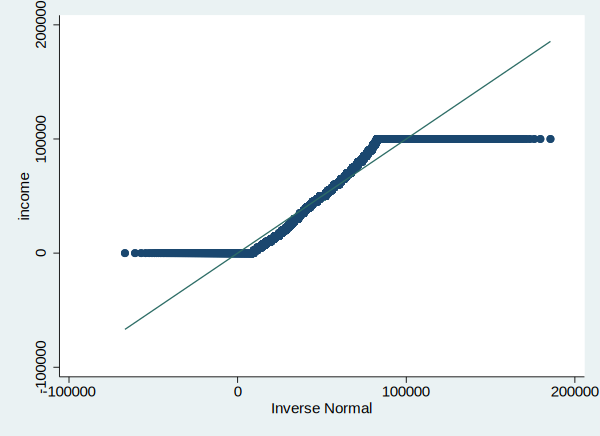

In [18]:
qnorm income if a_hga == 44

In [ ]:
hist income if a_hga == 43 & income != 2500 & income != 100000

In [10]:
swilk income if a_hga == 39


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
      income |     39,419    0.92098   1217.129    19.620    0.00000

Note: The normal approximation to the sampling distribution of W'
      is valid for 4<=n<=2000.


In [15]:
// getting 12th grade (graduating vs 11th grade)
ttest income if a_hga == 37| a_hga == 39, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Grade 11 |   5,488    9451.531    209.9856    15555.95    9039.876    9863.186
HS Gradu |  39,419    26501.69    123.5286    24525.64    26259.57    26743.81
---------+--------------------------------------------------------------------
combined |  44,907    24418.02    114.5008    24264.18     24193.6    24642.44
---------+--------------------------------------------------------------------
    diff |           -17050.16     340.212               -17716.98   -16383.34
------------------------------------------------------------------------------
    diff = mean(Grade 11) - mean(HS Gradu)                        t = -50.1163
Ho: diff = 0                                     degrees of freedom =    44905

    Ha: dif

In [18]:
// getting 12th grade (graduating vs some college)
ttest income if a_hga == 39| a_hga == 40, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
HS Gradu |  39,419    26501.69    123.5286    24525.64    26259.57    26743.81
Some col |  25,393    29326.68    171.1385    27271.23    28991.24    29662.13
---------+--------------------------------------------------------------------
combined |  64,812    27608.51    100.8448    25673.26    27410.85    27806.16
---------+--------------------------------------------------------------------
    diff |           -2824.998    206.2884               -3229.323   -2420.672
------------------------------------------------------------------------------
    diff = mean(HS Gradu) - mean(Some col)                        t = -13.6944
Ho: diff = 0                                     degrees of freedom =    64810

    Ha: dif

In [19]:
// getting 12th grade (graduating hs vs graduating college)
ttest income if a_hga == 39| a_hga == 43, by(a_hga)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
HS Gradu |  39,419    26501.69    123.5286    24525.64    26259.57    26743.81
Bachelor |  26,476    49263.77    206.7128    33635.16     48858.6    49668.94
---------+--------------------------------------------------------------------
combined |  65,895    35647.28    119.3669     30641.5    35413.32    35881.24
---------+--------------------------------------------------------------------
    diff |           -22762.08    226.7572               -23206.52   -22317.64
------------------------------------------------------------------------------
    diff = mean(HS Gradu) - mean(Bachelor)                        t = -1.0e+02
Ho: diff = 0                                     degrees of freedom =    65893

    Ha: dif

In [36]:
splitvallabels a_hga 
graph hbar xtitle(`r(relabel)')



45 is not a valid command name



In [7]:
splitvallabels a_hga
graph hbar, over(a_hga `r(relabel)') over(incomesegment)



31 invalid name



In [ ]:
tab incomesegment a_hga

In [ ]:
// hist a_hga, xlabel(31/46, valuelabel angle(45))

In [32]:
ssc install splitvallabels

checking splitvallabels consistency and verifying not already installed...
installing into /Users/jacob/Library/Application Support/Stata/ado/plus/...
installation complete.


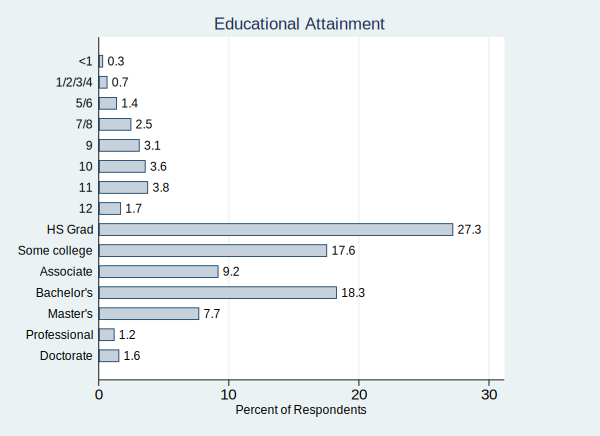

In [42]:
splitvallabels a_hga
graph hbar, ///
over(a_hga, label(labsize(small)) relabel(`r(relabel)')) ///
ytitle("Percent of Respondents", size(small)) ///
title("Educational Attainment", span size(medium)) ///
blabel(bar, format(%4.1f)) ///
intensity(25) aspect(0.8) scale(1)
 

In [36]:
hist ptot_r, title("Histogram of income") ytitle("Income level") xtitle("frequency") (bin(10)) horizontal bcolor(navy) ylabel(1/41, valuelabel angle(0)) ysize(10) 

(bin=10, start=1, width=4)
option density() not allowed



(bin=50, start=2, width=.76)


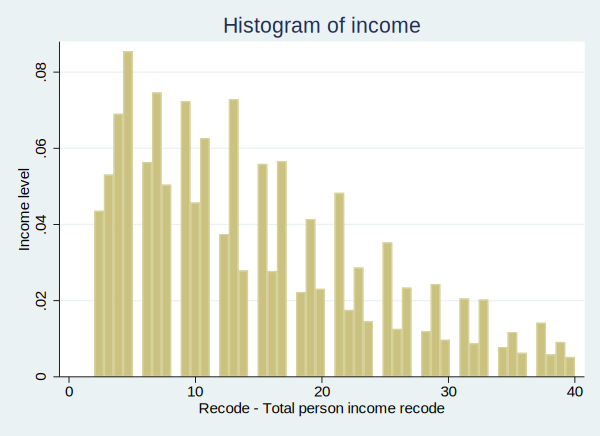

In [35]:
hist ptot_r if ptot_r != 1 & ptot_r != 41, title("Histogram of income") ytitle("Income level") 

In [16]:
// tables of both together
tab ptot_r a_hga

// hist ptot_r, title("Histogram of income") ytitle("Income level") xtitle(none) horizontal discrete bcolor(navy) ylabel(1/41, valuelabel angle(0)) 

// hist a_hga, title("Histogram of Educational Attainment")  horizontal discrete bcolor(navy) ylabel(31/46, valuelabel angle(0)) 


    Recode - Total |
     person income |                                                                  Item 18h - Educational attainment
            recode | Less than  1st,2nd,3  5th or 6t  7th and 8  9th grade  10th grad  11th grad  12th grad  High scho  Some coll  Associate  Bachelor'  Master's   Professio  Doctorate |     Total
-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------
      Under $2,500 |       164        239        483      1,780      2,772      2,955      2,730        927      6,093      3,800      1,352      2,514        779        107        103 |    26,798 
  $2,500 to $4,999 |        11         30         51         92        148        278        346         98        932        842        232        317        101          8         14 |     3,500 
  $5,000 to $7,499 |        30         50        117        128     

In [1]:
gen age = age1
replace age = 15 if age1 == 01
replace age = 16.5 if age1 == 02
replace age = 18.5 if age1 == 03
replace age = 20.5 if age1 == 04
replace age = 23 if age1 == 05
replace age = 27 if age1 == 06
replace age = 32 if age1 == 07
replace age = 37 if age1 == 08
replace age = 42 if age1 == 09
replace age = 47 if age1 == 10
replace age = 52 if age1 == 11
replace age = 57 if age1 == 12
replace age = 60.5 if age1 == 13
replace age = 63 if age1 == 14
replace age = 67 if age1 == 15
replace age = 72 if age1 == 16
replace age = 75 if age1 == 17
tab age


regress income i.a_hga age1

regress income i.a_hga age


age1 not found


r(111);
r(111);


In [1]:
use ptot_r age1 a_hga using cpsmar2017.dta

// dropping "not in universe" for total income (not sure if this is NA or just 0)
// drop if ptot_r == 0 | ptot_r == 1 | ptot_r == 41 // this also drops people who make 0 and make over 100000 usd
drop if ptot_r == 0 

// dropping the ones who didn't complete high school and didn't complete college
// drop if a_hga == 38 | a_hga == 40 

// combining the two associate degrees together
replace a_hga = 41 if a_hga == 42 

// tab ptot_r 
// tab a_hga
tab ptot_r a_hga



(41,274 observations deleted)

(7,629 real changes made)


    Recode - Total |
     person income |                                                                  Item 18h - Educational attainment
            recode | Less than  1st,2nd,3  5th or 6t  7th and 8  9th grade  10th grad  11th grad  12th grad  High scho  Some coll  Associate  Bachelor'  Master's   Professio  Doctorate |     Total
-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------
      Under $2,500 |       164        239        483      1,780      2,772      2,955      2,730        927      6,093      3,800      1,352      2,514        779        107        103 |    26,798 
  $2,500 to $4,999 |        11         30         51         92        148        278        346         98        932        842        232        317        101          8         14 |     3,500 
  $5,000

Histogram of Income, Ptot_r, and Age

In [17]:
// hist age1, title("Histogram of Age") ytitle("Age") xtitle(none) horizontal discrete bcolor(navy) ylabel(1/17, valuelabel angle(0)) 



Histogram that combines both together

In [3]:
gen income = ptot_r * 2500

regress income age1

regress income a_hga

regress income a_hga age1




      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(1, 144638)    =   5815.66
       Model |  5.5183e+12         1  5.5183e+12   Prob > F        =    0.0000
    Residual |  1.3724e+14   144,638   948870898   R-squared       =    0.0387
-------------+----------------------------------   Adj R-squared   =    0.0386
       Total |  1.4276e+14   144,639   987016611   Root MSE        =     30804

------------------------------------------------------------------------------
      income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        age1 |   1452.008   19.04011    76.26   0.000     1414.689    1489.326
       _cons |   21759.11   199.0833   109.30   0.000     21368.91    22149.31
------------------------------------------------------------------------------


      Source |       SS           df       MS 

In [4]:
regress income a_hga

regress income i.a_hga 



      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(1, 144638)    =  41353.03
       Model |  3.1741e+13         1  3.1741e+13   Prob > F        =    0.0000
    Residual |  1.1102e+14   144,638   767569793   R-squared       =    0.2223
-------------+----------------------------------   Adj R-squared   =    0.2223
       Total |  1.4276e+14   144,639   987016611   Root MSE        =     27705

------------------------------------------------------------------------------
      income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       a_hga |   5180.527   25.47536   203.35   0.000     5130.595    5230.458
       _cons |  -171859.8   1022.923  -168.01   0.000    -173864.7   -169854.9
------------------------------------------------------------------------------


      Source |       SS           df       MS  

In [5]:
gen age = age1
replace age = 15 if age1 == 01
replace age = 16.5 if age1 == 02
replace age = 18.5 if age1 == 03
replace age = 20.5 if age1 == 04
replace age = 23 if age1 == 05
replace age = 27 if age1 == 06
replace age = 32 if age1 == 07
replace age = 37 if age1 == 08
replace age = 42 if age1 == 09
replace age = 47 if age1 == 10
replace age = 52 if age1 == 11
replace age = 57 if age1 == 12
replace age = 60.5 if age1 == 13
replace age = 63 if age1 == 14
replace age = 67 if age1 == 15
replace age = 72 if age1 == 16
replace age = 75 if age1 == 17
tab age


regress income i.a_hga age1

regress income i.a_hga age



(2,954 real changes made)

(5,936 real changes made)

(4,789 real changes made)

(4,198 real changes made)

(6,407 real changes made)

(11,325 real changes made)

(12,549 real changes made)

(13,380 real changes made)

(12,233 real changes made)

(12,383 real changes made)

(12,040 real changes made)

(11,449 real changes made)

(4,248 real changes made)

(5,821 real changes made)

(8,568 real changes made)

(6,431 real changes made)

(9,929 real changes made)


        age |      Freq.     Percent        Cum.
------------+-----------------------------------
         15 |      2,954        2.04        2.04
       16.5 |      5,936        4.10        6.15
       18.5 |      4,789        3.31        9.46
       20.5 |      4,198        2.90       12.36
         23 |      6,407        4.43       16.79
         27 |     11,325        7.83       24.62
         32 |     12,549        8.68       33.30
         37 |     13,380        9.25       42.55
         42 |     12,233        8.46     

In [6]:
gen years_educated = 0
replace years_educated = 1 if a_hga == 31
replace years_educated = 2.5 if a_hga == 32
replace years_educated = 5.5 if a_hga == 33
replace years_educated = 7.5 if a_hga == 34
replace years_educated = 9 if a_hga == 35
replace years_educated = 10 if a_hga == 36
replace years_educated = 11 if a_hga == 37
replace years_educated = 12 if a_hga == 38
replace years_educated = 13 if a_hga == 39
replace years_educated = 14 if a_hga == 40
replace years_educated = 16 if a_hga == 41
replace years_educated = 16 if a_hga == 42
replace years_educated = 17 if a_hga == 43
replace years_educated = 19 if a_hga == 44
replace years_educated = 19 if a_hga == 45
replace years_educated = 20 if a_hga == 46
tab years_educated


regress income years_educated

regress income years_educated age




(483 real changes made)

(968 real changes made)

(2,029 real changes made)

(3,620 real changes made)

(4,550 real changes made)

(5,213 real changes made)

(5,488 real changes made)

(2,478 real changes made)

(39,419 real changes made)

(25,393 real changes made)

(13,312 real changes made)

(0 real changes made)

(26,476 real changes made)

(11,173 real changes made)

(1,758 real changes made)

(2,280 real changes made)


years_educa |
        ted |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        483        0.33        0.33
        2.5 |        968        0.67        1.00
        5.5 |      2,029        1.40        2.41
        7.5 |      3,620        2.50        4.91
          9 |      4,550        3.15        8.05
         10 |      5,213        3.60       11.66
         11 |      5,488        3.79       15.45
         12 |      2,478        1.71       17.17
         13 |     39,419       27.25       44.42
         14 |  

In [7]:
drop if a_hga == 38 | a_hga == 40 
regress income i.a_hga age
regress income i.a_hga 


(27,871 observations deleted)


      Source |       SS           df       MS      Number of obs   =   116,769
-------------+----------------------------------   F(13, 116755)   =   3592.67
       Model |  3.4720e+13        13  2.6707e+12   Prob > F        =    0.0000
    Residual |  8.6794e+13   116,755   743387584   R-squared       =    0.2857
-------------+----------------------------------   Adj R-squared   =    0.2856
       Total |  1.2151e+14   116,768  1.0406e+09   Root MSE        =     27265

------------------------------------------------------------------------------------------------------------------------------
                                                      income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------------------------------------------------+----------------------------------------------------------------
                                                       a_hga |
                                   1st,2nd,3rd,o

In [7]:
regress income i.a_hga age
regress income i.a_hga 



      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(15, 144624)   =   3355.85
       Model |  3.6860e+13        15  2.4573e+12   Prob > F        =    0.0000
    Residual |  1.0590e+14   144,624   732251692   R-squared       =    0.2582
-------------+----------------------------------   Adj R-squared   =    0.2581
       Total |  1.4276e+14   144,639   987016611   Root MSE        =     27060

------------------------------------------------------------------------------------------------------------------------------
                                                      income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------------------------------------------------+----------------------------------------------------------------
                                                       a_hga |
                                   1st,2nd,3rd,or 4th grade  |   2863.909   150

In [8]:

regress income age i.a_hga


      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(15, 144624)   =   3355.85
       Model |  3.6860e+13        15  2.4573e+12   Prob > F        =    0.0000
    Residual |  1.0590e+14   144,624   732251692   R-squared       =    0.2582
-------------+----------------------------------   Adj R-squared   =    0.2581
       Total |  1.4276e+14   144,639   987016611   Root MSE        =     27060

------------------------------------------------------------------------------------------------------------------------------
                                                      income |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------------------------------------------------+----------------------------------------------------------------
                                                         age |   185.8119   4.161463    44.65   0.000     177.6555    193.9683
                

In [15]:
// graph two scatter income age

In [10]:
drop if age1 == 0
* drop if age1 == 0 | age1 == 17
regress ptot_r a_hga age1


(0 observations deleted)


      Source |       SS           df       MS      Number of obs   =   144,640
-------------+----------------------------------   F(2, 144637)    =  22358.91
       Model |  5394287.85         2  2697143.93   Prob > F        =    0.0000
    Residual |  17447487.4   144,637  120.629489   R-squared       =    0.2362
-------------+----------------------------------   Adj R-squared   =    0.2361
       Total |  22841775.3   144,639  157.922658   Root MSE        =    10.983

------------------------------------------------------------------------------
      ptot_r |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       a_hga |   1.982369   .0102508   193.39   0.000     1.962277     2.00246
        age1 |   .3524966   .0068907    51.16   0.000      .338991    .3660022
       _cons |  -68.51249   .4055438  -168.94   0.000    -69.30735   -67.71763
-----------------------

In [11]:
gen newage = 0

In [12]:
count if age1 == 0

  0


In [13]:
tab age1 


     Age recode - |
Persons 15+ years |      Freq.     Percent        Cum.
------------------+-----------------------------------
         15 years |      2,954        2.04        2.04
  16 and 17 years |      5,936        4.10        6.15
  18 and 19 years |      4,789        3.31        9.46
  20 and 21 years |      4,198        2.90       12.36
   22 to 24 years |      6,407        4.43       16.79
   25 to 29 years |     11,325        7.83       24.62
   30 to 34 years |     12,549        8.68       33.30
   35 to 39 years |     13,380        9.25       42.55
   40 to 44 years |     12,233        8.46       51.00
   45 to 49 years |     12,383        8.56       59.56
   50 to 54 years |     12,040        8.32       67.89
   55 to 59 years |     11,449        7.92       75.80
   60 to 61 years |      4,248        2.94       78.74
   62 to 64 years |      5,821        4.02       82.77
   65 to 69 years |      8,568        5.92       88.69
   70 to 74 years |      6,431        4.45  

In [14]:
tab a_hga


      Item 18h - Educational attainment |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                    Less than 1st grade |        483        0.33        0.33
               1st,2nd,3rd,or 4th grade |        968        0.67        1.00
                       5th or 6th grade |      2,029        1.40        2.41
                      7th and 8th grade |      3,620        2.50        4.91
                              9th grade |      4,550        3.15        8.05
                             10th grade |      5,213        3.60       11.66
                             11th grade |      5,488        3.79       15.45
                  12th grade no diploma |      2,478        1.71       17.17
High school graduate - high school dipl |     39,419       27.25       44.42
             Some college but no degree |     25,393       17.56       61.98
Associate degree in college - occupatio |     13,312        9.20       71.1

In [15]:
tab ptot_r


    Recode - Total |
     person income |
            recode |      Freq.     Percent        Cum.
-------------------+-----------------------------------
      Under $2,500 |     26,798       18.53       18.53
  $2,500 to $4,999 |      3,500        2.42       20.95
  $5,000 to $7,499 |      4,263        2.95       23.89
  $7,500 to $9,999 |      5,544        3.83       27.73
$10,000 to $12,499 |      6,860        4.74       32.47
$12,500 to $14,999 |      4,526        3.13       35.60
$15,000 to $17,499 |      5,992        4.14       39.74
$17,500 to $19,999 |      4,050        2.80       42.54
$20,000 to $22,499 |      5,806        4.01       46.56
$22,500 to $24,999 |      3,672        2.54       49.09
$25,000 to $27,499 |      5,032        3.48       52.57
$27,500 to $29,999 |      3,009        2.08       54.65
$30,000 to $32,499 |      5,853        4.05       58.70
$32,500 to $34,999 |      2,242        1.55       60.25
$35,000 to $37,499 |      4,488        3.10       63.35
$37,5

In [16]:
drop if age1 == 0 | age1 == 17

(9,929 observations deleted)


In [17]:
drop if ptot_r == 0 | ptot_r == 41


(11,840 observations deleted)


In [18]:
regress ptot_r age1 a_hga


      Source |       SS           df       MS      Number of obs   =   122,871
-------------+----------------------------------   F(2, 122868)    =  15030.69
       Model |  2494851.21         2  1247425.61   Prob > F        =    0.0000
    Residual |  10197050.6   122,868  82.9919145   R-squared       =    0.1966
-------------+----------------------------------   Adj R-squared   =    0.1966
       Total |  12691901.8   122,870  103.295367   Root MSE        =      9.11

------------------------------------------------------------------------------
      ptot_r |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        age1 |   .4390436   .0067468    65.07   0.000       .42582    .4522672
       a_hga |    1.37058   .0096358   142.24   0.000     1.351694    1.389466
       _cons |  -46.58146   .3760609  -123.87   0.000    -47.31853   -45.84438
--------------------------------------------------

In [19]:
regress c.ptot_r c.a_hga


      Source |       SS           df       MS      Number of obs   =   122,871
-------------+----------------------------------   F(1, 122869)    =  24966.44
       Model |  2143407.23         1  2143407.23   Prob > F        =    0.0000
    Residual |  10548494.5   122,869  85.8515535   R-squared       =    0.1689
-------------+----------------------------------   Adj R-squared   =    0.1689
       Total |  12691901.8   122,870  103.295367   Root MSE        =    9.2656

------------------------------------------------------------------------------
      ptot_r |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       a_hga |   1.509861   .0095556   158.01   0.000     1.491132     1.52859
       _cons |  -48.23969   .3816059  -126.41   0.000    -48.98763   -47.49174
------------------------------------------------------------------------------


In [20]:
gen years_of_education = 0
replace years_of_education = 1 if a_hga == 31
replace years_of_education = 2 if 



(387 real changes made)

invalid syntax


r(198);
r(198);


In [ ]:
summarize years_of_education

Independent: 
A_HGA (Educational Attainment), ordinal categorical
Dependent:
PTOT_R (Total person income recode), ordinal categorical

regress c.ptot_r c.a_hga	

Use the variable "wsal_val" for annual wage and salary earnings. Drop observations if "wsal_val == 0."

In [ ]:
drop if wsal_val == 0



"hrswk" is hours worked per week and "wkswork" is weeks worked per year. Use these two variables and "wsal_val" to construct the wage rate. Drop if the wage rate is less than 1.

In [ ]:
gen wage_rate = (wsal_val)/(hrswk*wkswork)
drop if wage_rate < 1



Take the log of the wage rate and use the code "kdensity" to plot the log wage density. Copy-paste it your breakout sheet.

In [ ]:
gen log_wage = log(wage_rate)
twoway kdensity log_wage

Use the variable "pehspnon" to plot the log wage density by Hispanic and non-Hispanic. Copy-paste it into your breakout sheet.






In [ ]:
twoway kdensity log_wage if pehspnon == 1 || kdensity log_wage if pehspnon == 2

Present summary statistics (mean, standard deviation, sample size etc.) in a few tables and
appropriate graphs that describe your data. Choose the 2—3 graphs or tables (tables+graphs=2-3) that
best help describe the data. DESCRIPTIVE STATISTICS

Write 1-2 short paragraphs about your summary statistics and explain whether it is possible to
disentangle any causal effects. CAUSAL EFFECT

Finally, carry out a hypothesis test for a population mean using the outcome variable and independent
variable. Make sure to show each step (use five components), interpret the conclusion, and append
the Stata code. STATISTICAL INFERENCE